# TP2



In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt # pip install PyQt5

In [45]:
# funciones auxiliares
def fft2_mod(image):

  shifted_image_fft = np.fft.fftshift(np.fft.fft2(image))
  return 20*np.log(np.abs(shifted_image_fft))


def _filter_round_shape(height, width, radius):
  canvas = np.zeros((height, width))
  return cv.circle(canvas,
                     center=(int(canvas.shape[1]/2), int(canvas.shape[0]/2)),
                     radius=radius,
                     color=(255),
                     thickness=-1).astype(np.uint8)


def create_filter(height, width, radius=20):

  lp_filter = _filter_round_shape(height, width, radius)
  return lp_filter


In [46]:
def create_gauss_filter (h, w, k_size, sigma):  
    nucleo_g = cv.getGaussianKernel(k_size, sigma) 
    kernel = nucleo_g * nucleo_g.T
    kernel_tf = np.fft.fft2(kernel)   
    kernel_tf = create_filter(h, w, radius=40)

    return kernel, kernel_tf

(<Axes: >, <matplotlib.image.AxesImage at 0x1a872d7eb90>)

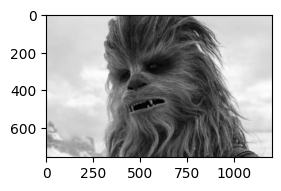

In [43]:
img = cv.imread('chewbacca.jpg', cv.IMREAD_GRAYSCALE)
plt.figure()
plt.subplot(121),plt.imshow(img,cmap = 'gray')

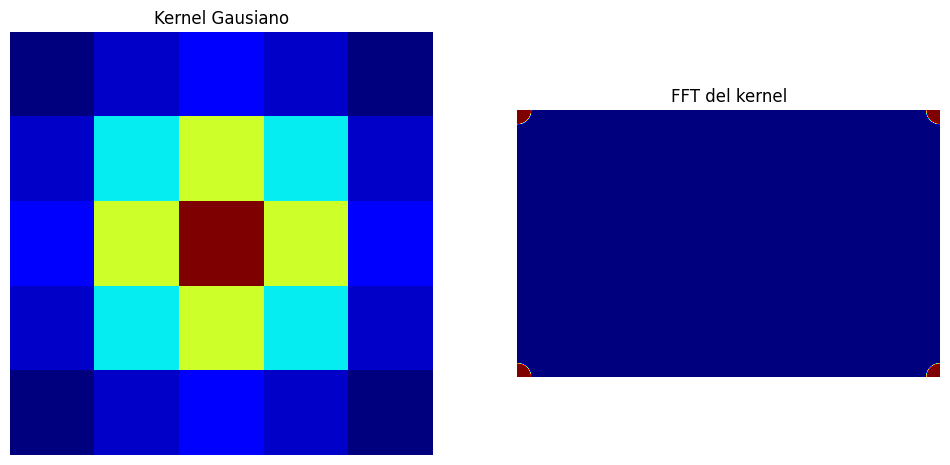

In [54]:
h, w = img.shape
kernel, kernel_tf = create_gauss_filter(h, w, k_size=5, sigma=1)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("FFT del kernel")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')

In [ ]:
shifted_fft = np.fft.fftshift(np.fft.fft2(img))
lp_filtered = shifted_fft * lp_filter
hp_filtered = shifted_fft * hp_filter

Text(0.5, 1.0, 'Desenfoque gausiano')

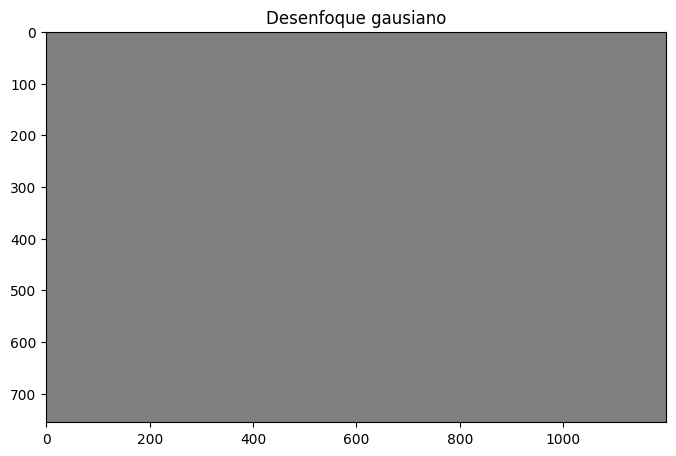

In [53]:
img_fft = np.fft.fft2(img)
filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8,8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

**2**

In [51]:
M, N = img.shape
F = np.fft.fft2(img)
Fc = np.fft.ifftshift(np.real(F))
AF = np.abs(Fc)
M = np.max(AF)
thres= M/1000
Th=np.where()
FM=(Th/(M*N))

TypeError: where() missing 1 required positional argument: 'condition'